# Salary Prediction EDA

# Part 1: Define

# The Problem
The goal of this project is to predict the salary of a new job posting and by buildinga model to predict the salries in the test_salaries dataset

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2: Discover

# Load the Data

In [2]:
train_features = pd.read_csv('/Users/NeilPatel/Desktop/Salary Prediction Data/train_features.csv')
test_features = pd.read_csv('/Users/NeilPatel/Desktop/Salary Prediction Data/test_features.csv')
train_salaries = pd.read_csv('/Users/NeilPatel/Desktop/Salary Prediction Data/train_salaries.csv')

In [3]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [10]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [11]:
train_salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [12]:
#Merge both train and test features on jobId
train=pd.merge(train_features,train_salaries,on='jobId')
train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


# Data Cleaning

In [14]:
#We will check to see if there are duplicates in the new merged data frame.
train.duplicated().sum()

0

In [15]:
#We wiil check to see if any of the salary amounts are negative values
(train.salary <= 0).sum()

5

In [16]:
#Remove the data that shows negative salaries
train_data = train[(train.salary > 0)]
train_df = train_data.copy()
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [17]:
#The length of the data with the negative salaries.
len(train)

1000000

In [18]:
#The length of the new data without the negative salries.
len(train_df)

999995

# Exploratory Data Analysis (EDA)

In [19]:
#Identify numerical and categorical variables
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [20]:
test_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [21]:
numeric_data = ['yearsExperience', 'milesFromMetropolis', 'salary']
categorical_data = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [22]:
#summary statistics of numeric data
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [23]:
train_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684485274,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


# Data Vizualization

Text(0.5, 1, 'Salary Distribution')

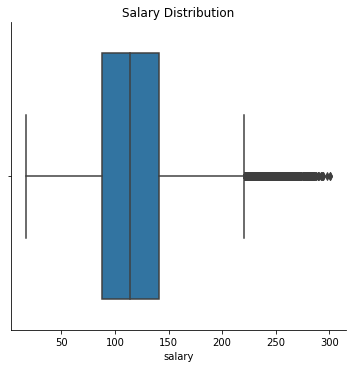

In [24]:
sns.catplot(x='salary', data=train_df, kind='box')
plt.title('Salary Distribution')

Text(0.5, 1.0, 'Salary Distribution')

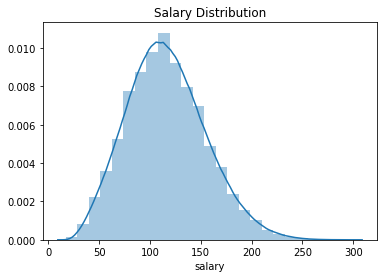

In [25]:
sns.distplot(train_df.salary, bins = 25, hist=True)
plt.title('Salary Distribution')

In [26]:
#Calculate the Inter Quartile Range (IQR) to find the outliers of the data
stat = train_df.salary.describe()
print(stat)
iqr = stat['75%']- stat['25%']
upper_bound = stat['75%'] + 1.5 * iqr
lower_bound = stat['25%'] - 1.5 * iqr
print(upper_bound, lower_bound)
#We can see that the upper bound of the data is 220.5 and the lower bound of the data is 8.5

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
220.5 8.5


In [27]:
#We want to double check our data to see if there is any values less than 8.5 or greter than 220.5 so that our data is clean
print(train_df[train_df.salary < 8.5])
print(train_df[train_df.salary > 220.5])
#We can conclude that there is no outlier past the lower bound making the data fully cleaned and ready to go onto next steps

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis, salary]
Index: []
                   jobId companyId         jobType     degree        major  \
266     JOB1362684407953    COMP30             CEO    MASTERS      BIOLOGY   
362     JOB1362684408049    COMP38             CTO    MASTERS         NONE   
560     JOB1362684408247    COMP53             CEO    MASTERS      BIOLOGY   
670     JOB1362684408357    COMP26             CEO    MASTERS         MATH   
719     JOB1362684408406    COMP54  VICE_PRESIDENT   DOCTORAL      BIOLOGY   
...                  ...       ...             ...        ...          ...   
998516  JOB1362685406203    COMP29             CFO    MASTERS  ENGINEERING   
999249  JOB1362685406936    COMP30             CEO       NONE         NONE   
999280  JOB1362685406967     COMP2             CFO  BACHELORS     BUSINESS   
999670  JOB1362685407357    COMP20             CEO   DOCTORAL   LITERATURE   
999893  

In [28]:
#Count how many people are in the specific position in the data
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [29]:
print(train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')])

                   jobId companyId jobType     degree        major industry  \
1222    JOB1362684408909    COMP40  JUNIOR    MASTERS      COMPSCI      OIL   
27710   JOB1362684435397    COMP21  JUNIOR   DOCTORAL  ENGINEERING      OIL   
31355   JOB1362684439042    COMP45  JUNIOR   DOCTORAL      COMPSCI  FINANCE   
100042  JOB1362684507729    COMP17  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
160333  JOB1362684568020    COMP18  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
189582  JOB1362684597269    COMP32  JUNIOR   DOCTORAL     BUSINESS      OIL   
214606  JOB1362684622293    COMP47  JUNIOR    MASTERS     BUSINESS  FINANCE   
303778  JOB1362684711465    COMP51  JUNIOR    MASTERS  ENGINEERING      WEB   
348354  JOB1362684756041    COMP56  JUNIOR   DOCTORAL  ENGINEERING      OIL   
427593  JOB1362684835280    COMP54  JUNIOR   DOCTORAL  ENGINEERING  FINANCE   
500739  JOB1362684908426    COMP40  JUNIOR   DOCTORAL  ENGINEERING      OIL   
627534  JOB1362685035221     COMP5  JUNIOR   DOCTORA

In [30]:
print(train_data[(train_data.salary > 220.5) & (train_data.jobType == 'SENIOR')])

                   jobId companyId jobType     degree        major industry  \
23150   JOB1362684430837    COMP23  SENIOR    MASTERS         MATH      WEB   
27880   JOB1362684435567    COMP60  SENIOR    MASTERS  ENGINEERING      WEB   
60439   JOB1362684468126    COMP46  SENIOR   DOCTORAL  ENGINEERING      OIL   
79242   JOB1362684486929     COMP5  SENIOR   DOCTORAL     BUSINESS  FINANCE   
94729   JOB1362684502416     COMP3  SENIOR    MASTERS  ENGINEERING      WEB   
...                  ...       ...     ...        ...          ...      ...   
923366  JOB1362685331053     COMP9  SENIOR  BACHELORS  ENGINEERING      OIL   
980198  JOB1362685387885    COMP24  SENIOR  BACHELORS  ENGINEERING  FINANCE   
984694  JOB1362685392381    COMP45  SENIOR  BACHELORS  ENGINEERING      OIL   
997016  JOB1362685404703     COMP4  SENIOR   DOCTORAL  ENGINEERING      OIL   
998365  JOB1362685406052    COMP11  SENIOR   DOCTORAL     BUSINESS  FINANCE   

        yearsExperience  milesFromMetropolis  salar

We can conclude that a junior role has at least 18 years of experience and a senior role has at least 19 years of experince.

In [31]:
print(train_data[(train_data.salary > 220.5) & (train_data.jobType == 'CEO')])

                   jobId companyId jobType       degree        major industry  \
266     JOB1362684407953    COMP30     CEO      MASTERS      BIOLOGY      OIL   
560     JOB1362684408247    COMP53     CEO      MASTERS      BIOLOGY      WEB   
670     JOB1362684408357    COMP26     CEO      MASTERS         MATH     AUTO   
966     JOB1362684408653    COMP32     CEO     DOCTORAL  ENGINEERING  FINANCE   
1577    JOB1362684409264    COMP50     CEO  HIGH_SCHOOL         NONE   HEALTH   
...                  ...       ...     ...          ...          ...      ...   
998246  JOB1362685405933    COMP16     CEO      MASTERS     BUSINESS      OIL   
998346  JOB1362685406033     COMP0     CEO    BACHELORS         MATH   HEALTH   
999249  JOB1362685406936    COMP30     CEO         NONE         NONE      OIL   
999670  JOB1362685407357    COMP20     CEO     DOCTORAL   LITERATURE  SERVICE   
999893  JOB1362685407580     COMP9     CEO     DOCTORAL  ENGINEERING  FINANCE   

        yearsExperience  mi

In [32]:
print(train_data[(train_data.salary > 220.5) & (train_data.jobType == 'CFO')])

                   jobId companyId jobType       degree        major industry  \
986     JOB1362684408673    COMP37     CFO  HIGH_SCHOOL         NONE  FINANCE   
1827    JOB1362684409514    COMP33     CFO  HIGH_SCHOOL         NONE      OIL   
1907    JOB1362684409594     COMP4     CFO    BACHELORS  ENGINEERING  FINANCE   
2116    JOB1362684409803     COMP3     CFO     DOCTORAL  ENGINEERING     AUTO   
2356    JOB1362684410043     COMP3     CFO    BACHELORS         MATH      WEB   
...                  ...       ...     ...          ...          ...      ...   
997215  JOB1362685404902     COMP3     CFO  HIGH_SCHOOL         NONE  FINANCE   
998421  JOB1362685406108    COMP46     CFO     DOCTORAL     BUSINESS  FINANCE   
998446  JOB1362685406133    COMP46     CFO      MASTERS  ENGINEERING      WEB   
998516  JOB1362685406203    COMP29     CFO      MASTERS  ENGINEERING      WEB   
999280  JOB1362685406967     COMP2     CFO    BACHELORS     BUSINESS  SERVICE   

        yearsExperience  mi

# Data Vizualization
In this section we will be vizualising every column with salary and see correlations and patterns that the data gives us.

In [33]:
#Use a function to define the plot relation between features and target.
def plot_data(df, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

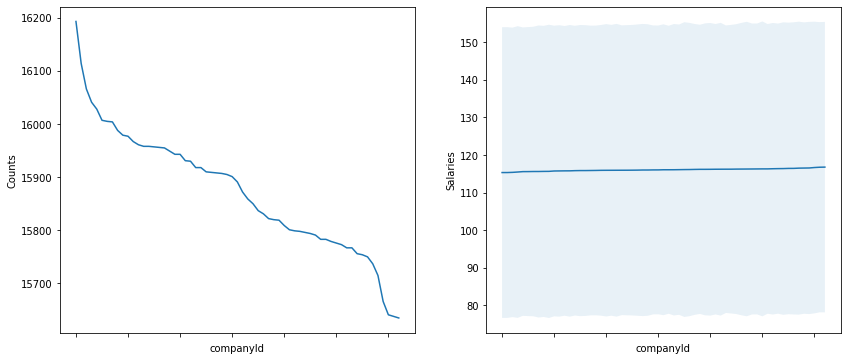

In [34]:
plot_data(train_df, 'companyId')

We can say that there is a very weak correlation between the feature of companyId and salary of the workers.

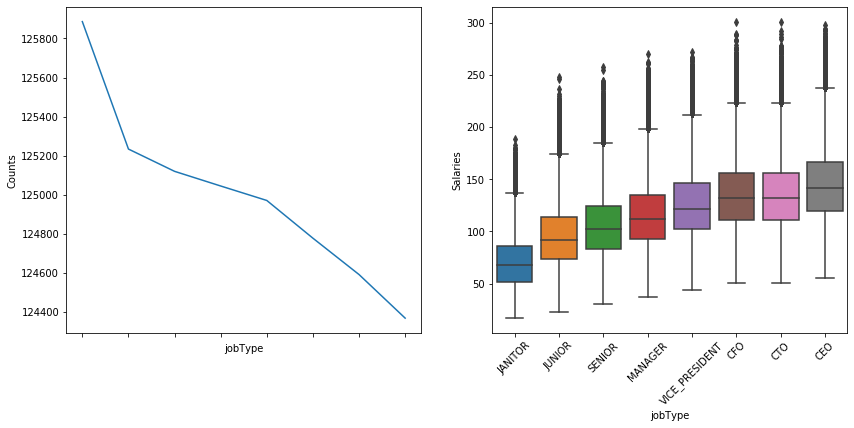

In [35]:
plot_data(train_df, 'jobType')

We can see that as the position of the worker becomes more higher up, the salary clearly shows an increase in salary.

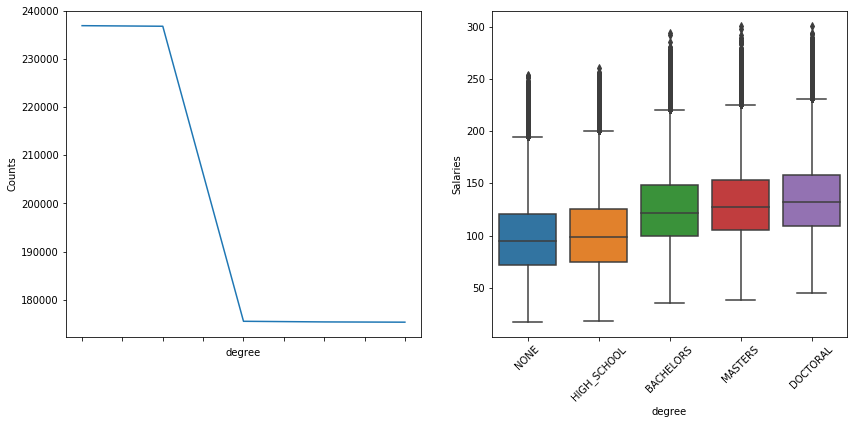

In [36]:
plot_data(train_df, 'degree')

These two plots show that most workers graduated from high school or no education, but with that, the workers with a higher degree tend to make more of a salary.

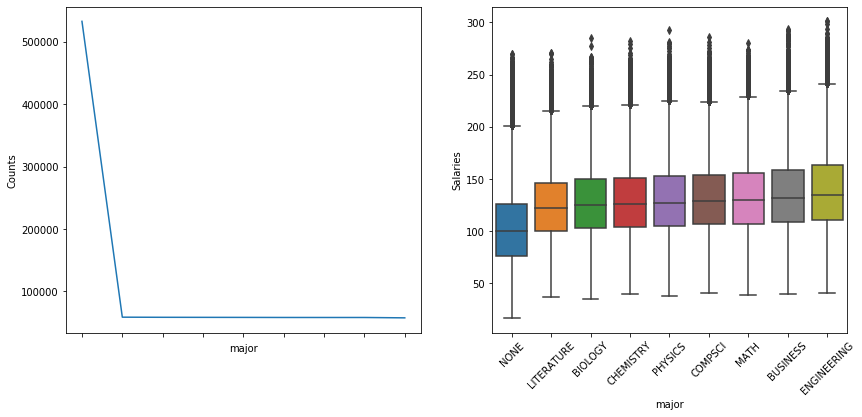

In [37]:
plot_data(train_df, 'major')

We can see that with a more rigorous major, the worker makes more salary.

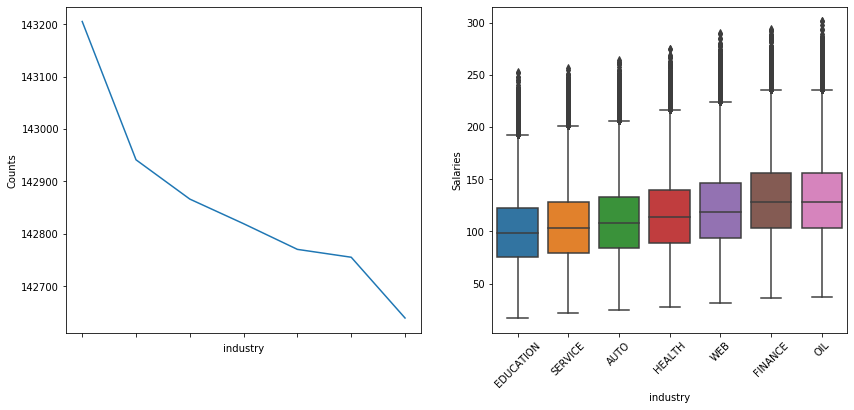

In [38]:
plot_data(train_df, 'industry')

This shows that oil makes the highest salary, but is not as acattered as Web which takes over a big portion of the counts in the data, but with alraies scattered around.

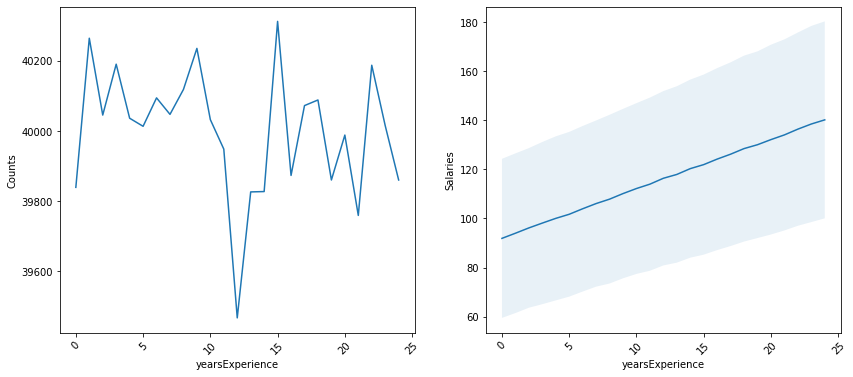

In [39]:
plot_data(train_df, 'yearsExperience')

The greater the number of years, the more of a salary the worker will make.

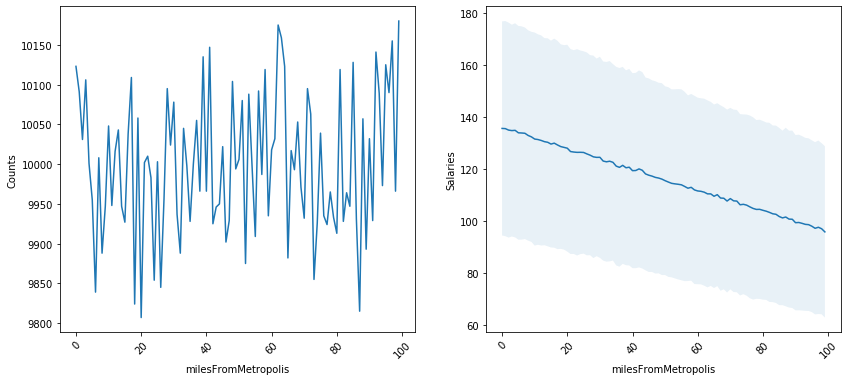

In [40]:
plot_data(train_df, 'milesFromMetropolis')

The farther you are from a metropolis, the less of a salray you will make, but the correlation is not strong enough.

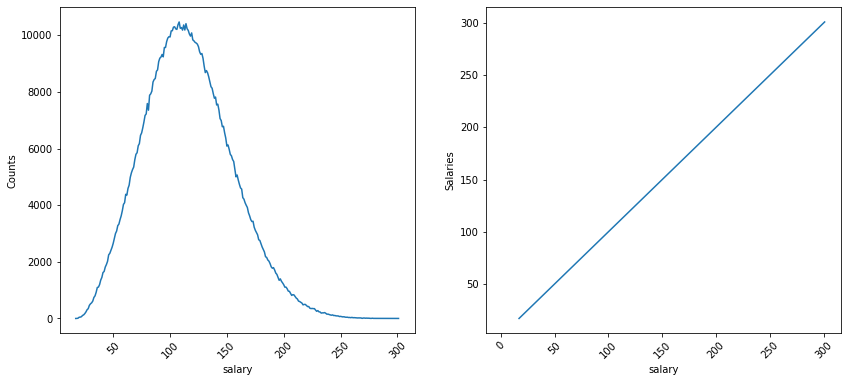

In [41]:
plot_data(train_df, 'salary')

In [42]:
train_df.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

We will be changing the object types to categories types and display the data.

In [43]:
def encode_label(df, col):
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [44]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [45]:
train_df.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [46]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163
5,JOB1362684407692,115.847117,115.368518,135.490979,132.075605,130.747659,2,31,113
6,JOB1362684407693,115.847117,135.458547,98.176882,102.583864,115.735540,23,24,178
7,JOB1362684407694,116.176489,95.333087,125.454663,129.072085,99.448386,9,70,73
8,JOB1362684407695,115.934192,70.813045,101.921085,102.583864,99.448386,1,54,31
9,JOB1362684407696,116.515543,125.368630,125.454663,129.072085,109.435222,17,68,104


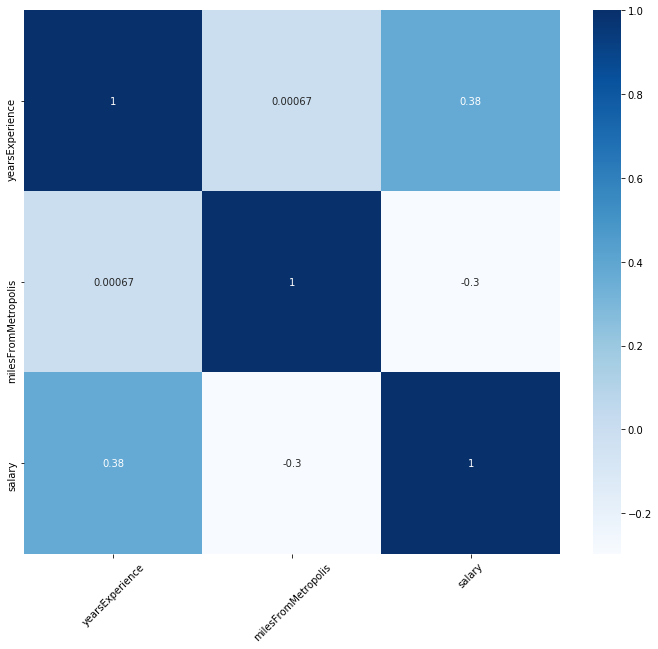

In [47]:
#Vizualize the data using a heatmap
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()